# Mínimos cuadrados Ordinarios

El método de minimos cuadrados ordinarios busca minimizar la suma de los cuadrados de los residuos.
$$
\sum^n_{i=1} \epsilon^2_{i}=\sum^n_{i=1}(y_{i}-\mathbf{b^{'}x_{i}})^2
$$
Si minimizamos obtenemos:
$$
\min_{\mathbf{b}} S(\mathbf{b})=\mathbf{\epsilon^{'}\epsilon} = \mathbf{(y-Xb)(y-Xb)}
$$
$$
S(\mathbf{b})=\mathbf{y'y}-2\mathbf{y'Xb+b'X'Xb}
$$
La consiciones de mínimo es:
$$
\frac{\partial S(\mathbf{b})}{\partial \mathbf{b}}=-2\mathbf{X'y} + 2\mathbf{X'Xb=0}
$$
Despejando tenemos:
$$
\mathbf{b=(X'X)^{-1} X'y}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=[0,1,2,3,4,5,6,7,8] #creamos dos listas
y=[15.2, 15.9, 16.7, 17.1, 17.8, 18.2, 18.3, 19.2, 20]

In [3]:
x=np.array(x) #con numpy los convertirmos en vectores
y=np.array(y)

In [4]:
A=np.array([np.ones(9), 
            x]).T
print(A)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]]


Calculamos $\mathbf{b=(X'X)^{-1} X'y}$

In [5]:
At=A.T
w=np.linalg.inv(At @ A) @ At @ y
print(w)

[15.37333333  0.55666667]


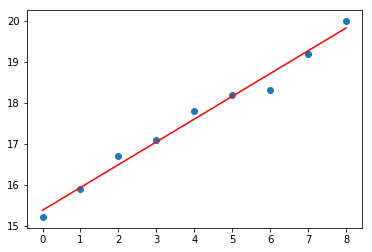

In [6]:
plt.scatter(x,y)
plt.plot([0,8], [w[0] + w[1]*0, w[0] + w[1]*8], c="red")
plt.show()

# Aguste cúbico

In [7]:
nx=len(x)
x2 = np.zeros(nx)
for i in range(0,nx):
    x2[i]=x[i] ** 2
print(x2)

[ 0.  1.  4.  9. 16. 25. 36. 49. 64.]


In [8]:
x3 = np.zeros(nx)
for i in range(0,nx):
    x3[i]=x[i] ** 3
print(x3)

[  0.   1.   8.  27.  64. 125. 216. 343. 512.]


In [9]:
A2=np.array([np.ones(9), 
            x,
            x2,
            x3]).T
print(A2)

[[  1.   0.   0.   0.]
 [  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]
 [  1.   6.  36. 216.]
 [  1.   7.  49. 343.]
 [  1.   8.  64. 512.]]


In [10]:
A2t=A2.T
u=np.linalg.inv(A2t @ A2) @ A2t @ y
print(u)

[ 1.51353535e+01  1.00654161e+00 -1.40548341e-01  1.12794613e-02]


Comparativa: Ajuste Lineal y ajuste cúbico

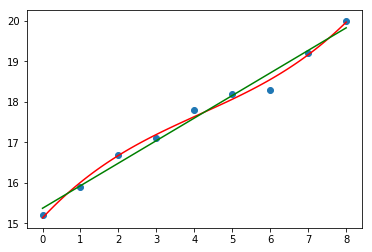

In [11]:
plt.scatter(x,y)
def h(x):
    return u[0]+u[1] * x + u[2]* x**2 + u[3]*x**3
x=np.linspace(0,8,100)
plt.plot(x, h(x),"r-", label="Cúbica")
plt.plot([0,8], [w[0] + w[1]*0, w[0] + w[1]*8], c="green")
plt.show()